## Install Open MMLab Detection Toolbox

In [2]:
import os
from os.path import exists, join, basename, splitext
working_folder = os.getcwd()
git_repo_url = 'https://github.com/open-mmlab/mmdetection'

mmdetection_dir = os.path.join(working_folder, "mmdetection")
if not exists(mmdetection_dir):
    ! git clone -q --recurse-submodules  $git_repo_url
    print("Update mmdetection repo")
    !cd {mmdetection_dir} && git checkout master && git pull
    # dependencies
    !pip install -q mmcv terminaltables
    # build
    !cd {mmdetection_dir} && python setup.py install
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

In [3]:
# You may need to restart your runtime prior to this, to let your installation take effect.
import os
import sys
sys.path.append(mmdetection_dir)
import time
import matplotlib
import matplotlib.pylab as plt
from os.path import exists, join, basename, splitext
working_folder = os.getcwd()
mmdetection_dir = os.path.join(working_folder, "mmdetection")

## Read config file

In [4]:
import os
import re
config_file = './config/retinanet_r50_fpn_1x.py'
config_fname = os.path.join(working_folder, config_file)
assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
with open(config_fname) as f:
    s = f.read()
    work_dir = re.findall(r"work_dir = \'(.*?)\'", s)[0]
print(work_dir)

./work_dirs/retinanet_r50_fpn_1x


In [5]:
import json
for file in ("instances_train2017.json","instances_val2017.json"):
    annotation_path = os.path.join(working_folder, "dataset",file )
    json_file = open(annotation_path)
    coco = json.load(json_file)
    print(coco["categories"])
    classes_names = [category["name"] for category in coco["categories"]]
    print(classes_names)

[{'id': 0, 'name': 'pedestrian'}, {'id': 1, 'name': 'people'}, {'id': 2, 'name': 'bicycle'}, {'id': 3, 'name': 'car'}, {'id': 4, 'name': 'van'}, {'id': 5, 'name': 'truck'}, {'id': 6, 'name': 'tricycle'}, {'id': 7, 'name': 'awning-tricycle'}, {'id': 8, 'name': 'bus'}, {'id': 9, 'name': 'motor'}]
['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
[{'id': 0, 'name': 'pedestrian'}, {'id': 1, 'name': 'people'}, {'id': 2, 'name': 'bicycle'}, {'id': 3, 'name': 'car'}, {'id': 4, 'name': 'van'}, {'id': 5, 'name': 'truck'}, {'id': 6, 'name': 'tricycle'}, {'id': 7, 'name': 'awning-tricycle'}, {'id': 8, 'name': 'bus'}, {'id': 9, 'name': 'motor'}]
['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']


## Train the model

In [6]:
!python mmdetection/tools/train.py {config_fname}

2020-04-28 15:06:43,535 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla P100-PCIE-16GB
GCC: gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_

### Verify the checkpoint file exists.

In [7]:
checkpoint_file = os.path.join(work_dir, "latest.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

'/home/jupyter/work_dirs/retinanet_r50_fpn_1x/latest.pth'

## Test predict

Turn down the `score_thr` if you think the model is missing any bbox.
Turn up the `score_thr` if you see too much overlapping bboxes with low scores.

In [8]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result, init_detector

In [9]:
score_thr = 0.5

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results
img = './dataset/upload_val/val/0000289_05401_d_0000838.jpg'

result = inference_detector(model, img)
show_result(img, result, classes_names,
            score_thr=score_thr, out_file="result.jpg")

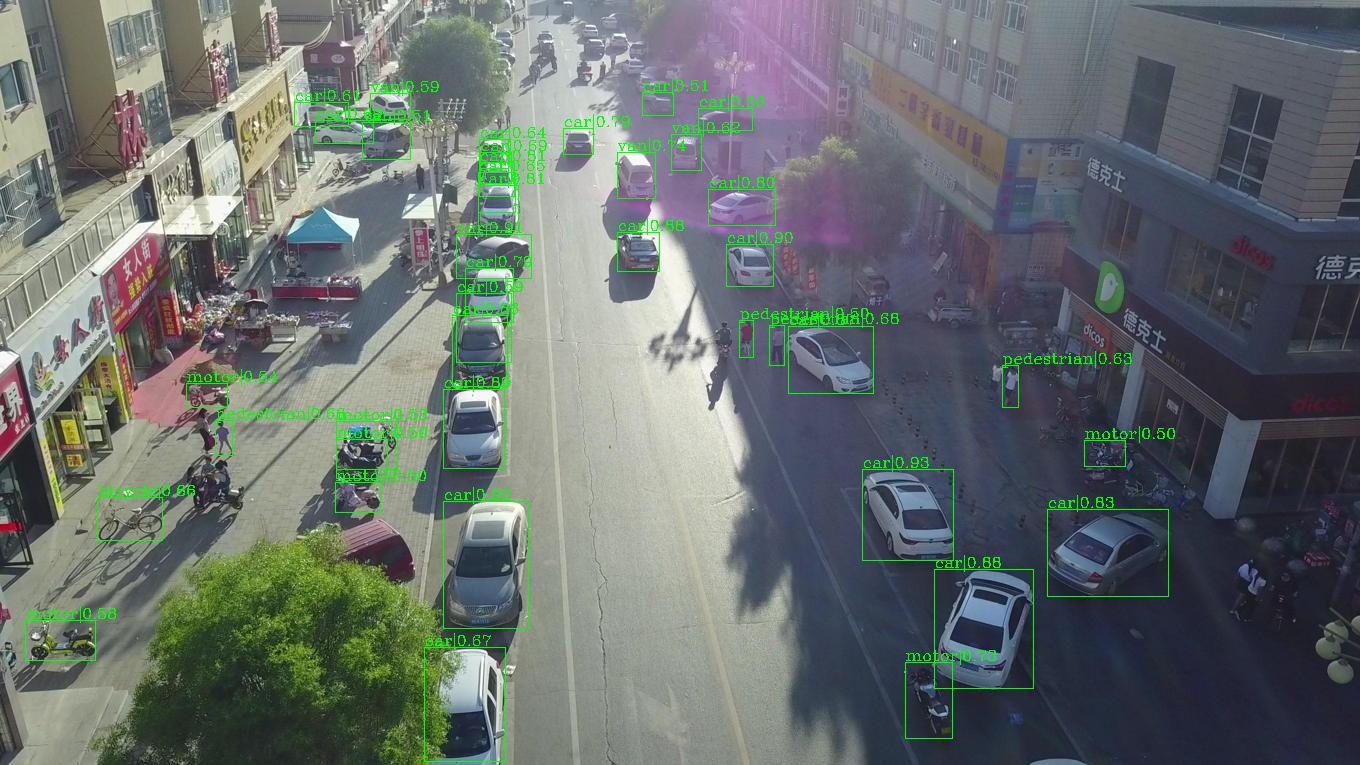

In [10]:
from IPython.display import Image
Image(filename='result.jpg')